# Reports for case study



In [1]:
#!pip install -r ../requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import os
from tabulate import tabulate
import gc
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,10)

In [3]:
# settings
db_file = '../db/production.db'

Preliminary checks (ex: database availability)

In [4]:
if not os.path.exists(db_file):
    raise FileNotFoundError ('Database file not found')

billings per product group / product / site / month …

+--------------+------------+------------+------------+-------------+-------------+-------------+-------------+-------------+------------+
|     type     |  2018-Q1   |  2018-Q2   |  2018-Q3   |   2018-Q4   |   2019-Q1   |   2019-Q2   |   2019-Q3   |   2019-Q4   |  2020-Q1   |
+--------------+------------+------------+------------+-------------+-------------+-------------+-------------+-------------+------------+
| instant_game | 163832.80  | 503605.50  | 851577.70  | 1202911.20  | 1504849.40  | 1865282.10  | 2227733.00  | 2567613.90  | 912566.50  |
| lottery_game | 1555020.35 | 4723621.14 | 8021960.44 | 11312880.37 | 14199011.97 | 17500765.95 | 20918953.70 | 24165776.00 | 8598006.32 |
+--------------+------------+------------+------------+-------------+-------------+-------------+-------------+-------------+------------+


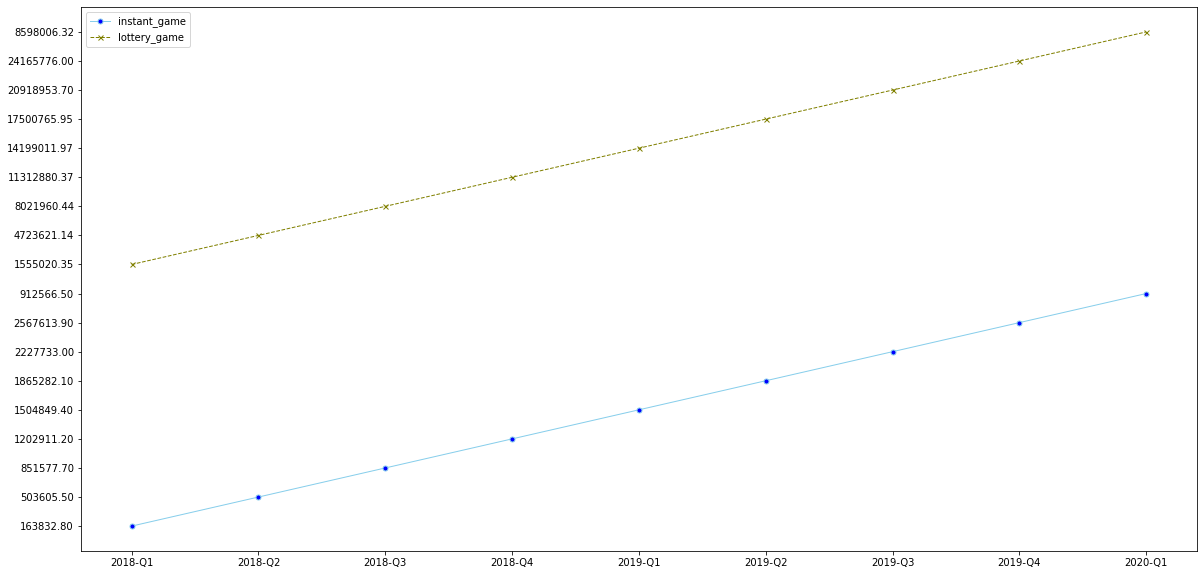

3752

In [8]:
# product group
df = pd.DataFrame([])
with sqlite3.connect(db_file) as conn:
    query = 'select "type",name,website ,booking_month ,booking_year ||\'-Q\'||booking_quarter as quarter , total_price from billing_vw bv;'
    df = pd.read_sql_query(query, con=conn)

by_type = df.groupby(['type', 'quarter']).agg({'total_price': ['sum']}).reset_index()
by_type.columns = ['type', 'quarter', 'total_price']
by_type['total_price'] = by_type['total_price'].apply(lambda x: '{:.2f}'.format(x))
print(tabulate(by_type.pivot(index='type', columns='quarter', values='total_price'), headers='keys', tablefmt='pretty'))

# plotting
plt.plot( 'quarter', 'total_price', data=by_type[by_type['type'] == 'instant_game'], marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=1, label='instant_game')
plt.plot( 'quarter', 'total_price', data=by_type[by_type['type'] == 'lottery_game'], marker='x', markerfacecolor='green', markersize=5, color='olive', linestyle='dashed', linewidth=1, label='lottery_game')
# show legend
plt.legend()

# show graph
plt.show()

del(by_type)
gc.collect()

In [9]:
# product name
by_name = df.groupby(['name', 'quarter']).agg({'total_price': ['sum']}).reset_index()
by_name.columns = ['name', 'quarter', 'total_price']
by_name['total_price'] = by_name['total_price'].apply(lambda x: '{:.2f}'.format(x))
print(tabulate(by_name.pivot(index='name', columns='quarter', values='total_price'), headers='keys', tablefmt='pretty'))

# plotting?


del(by_name)
gc.collect()

+-------------------------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+
|          name           |  2018-Q1  |  2018-Q2  |  2018-Q3   |  2018-Q4   |  2019-Q1   |  2019-Q2   |  2019-Q3   |  2019-Q4   |  2020-Q1   |
+-------------------------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+
|       cash_4_life       | 136644.75 | 411482.50 | 697974.75  | 980344.75  | 1224990.25 | 1521762.00 | 1812170.25 | 2088209.75 | 742786.00  |
|        dickehose        |  682.80   |  2073.60  |  3418.80   |  4802.40   |  6141.00   |  7566.00   |  9081.60   |  10480.80  |  3712.80   |
|     dschungelfieber     |  643.20   |  1976.40  |  3404.40   |  4912.80   |  6142.20   |  7629.60   |  9076.80   |  10522.20  |  3709.80   |
|     dschungelkoenig     |  683.40   |  2058.00  |  3429.00   |  4894.20   |  6111.60   |  7445.40   |  9065.40   |  10447.20  |  3709.20   |

22

In [10]:
# website

by_website = df.groupby(['website', 'quarter']).agg({'total_price': ['sum']}).reset_index()
by_website.columns = ['website', 'quarter', 'total_price']
by_website['total_price'] = by_website['total_price'].apply(lambda x: '{:.2f}'.format(x))
print(tabulate(by_website.pivot(index='website', columns='quarter', values='total_price'), headers='keys', tablefmt='pretty'))

# plotting?


del(by_website)
gc.collect()

+----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+-----------+
| website  |  2018-Q1  |  2018-Q2  |  2018-Q3  |  2018-Q4   |  2019-Q1   |  2019-Q2   |  2019-Q3   |  2019-Q4   |  2020-Q1  |
+----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+-----------+
| websiteA | 173898.94 | 524621.35 | 878279.54 | 1251735.85 | 1581944.84 | 1940706.62 | 2326118.39 | 2674482.36 | 952972.97 |
| websiteB | 172824.45 | 515407.65 | 896132.80 | 1263598.69 | 1565732.25 | 1943917.95 | 2324960.82 | 2672919.66 | 948097.39 |
| websiteC | 174164.90 | 529934.01 | 890028.97 | 1248041.56 | 1577937.18 | 1921760.49 | 2292727.43 | 2671016.33 | 948052.21 |
| websiteD | 166839.65 | 515658.20 | 885087.76 | 1249315.11 | 1570335.80 | 1939071.22 | 2307748.36 | 2681227.78 | 964641.08 |
| websiteE | 171069.56 | 532993.53 | 887908.89 | 1251593.64 | 1574243.05 | 1941207.55 | 2325976.11 | 2683510.83 | 9519

22

In [11]:
# month

by_month = df.groupby(['booking_month', 'quarter']).agg({'total_price': ['sum']}).reset_index()
by_month.columns = ['booking_month', 'quarter', 'total_price']
by_month['total_price'] = by_month['total_price'].apply(lambda x: '{:.2f}'.format(x))
print(tabulate(by_month.pivot(index='booking_month', columns='quarter', values='total_price'), headers='keys', tablefmt='pretty'))

# plotting?


del(by_month)
gc.collect()

+---------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+
| booking_month |  2018-Q1  |  2018-Q2   |  2018-Q3   |  2018-Q4   |  2019-Q1   |  2019-Q2   |  2019-Q3   |  2019-Q4   |  2020-Q1   |
+---------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+
|      01       | 210083.26 |    nan     |    nan     |    nan     | 5024632.03 |    nan     |    nan     |    nan     | 9510572.82 |
|      02       | 535204.39 |    nan     |    nan     |    nan     | 4880318.43 |    nan     |    nan     |    nan     |    nan     |
|      03       | 973565.50 |    nan     |    nan     |    nan     | 5798910.91 |    nan     |    nan     |    nan     |    nan     |
|      04       |    nan    | 1340283.00 |    nan     |    nan     |    nan     | 6014266.72 |    nan     |    nan     |    nan     |
|      05       |    nan    | 1780205.03 |    nan     |    nan

22

new / active customer per month, week, day and site

In [ ]:
# # day
# df = pd.DataFrame([])
# with sqlite3.connect(db_file) as conn:
#     query = 'select booking_month, booking_quarter , total_price from billing_vw bv;'
#     df = pd.read_sql_query(query, con=conn)

# by_month = df.groupby(['booking_month', 'booking_quarter']).agg({'total_price': ['sum']}).reset_index()
# by_month.columns = ['booking_month', 'booking_quarter', 'total_price']
# by_month['total_price'] = by_month['total_price'].apply(lambda x: '{:.2f}'.format(x))
# print(tabulate(by_month.pivot(index='booking_month', columns='booking_quarter', values='total_price'), headers='keys', tablefmt='pretty'))

# # plotting?


# del(df)
# del(by_month)
# gc.collect()

average basket spend per customer

previous month differences